# Notebook to conduct ML related tasks

# Imports

#### Standard library imports

In [161]:
import sys
sys.path.append("../")
import os
import pickle
import random

#### Third party imports

In [304]:
import boto3
import kaggle
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import metrics

#### Local application imports

In [3]:
%load_ext autoreload
%autoreload 2

from pkg_dir.config import *
from pkg_dir.src.utils import *
from pkg_dir.src.functions import *
from pkg_dir.src.parameters import *

In [ ]:
bool(random.getrandbits(1))

In [ ]:
pd.Series(
    [
        bool(random.getrandbits(1))
        for i in range(1, 11)
    ]
)

# Segmented pipeline

## Extract

### Locally saved results

In [141]:
pkl_obj = 'extract_Xy_train.pkl'
# pkl_obj = 'extract_X_test.pkl'

In [142]:
with open(pipeline_pkl_extract_local_dir + pkl_obj, 'rb') as obj:
    dfx = pickle.load(obj)

## Transform

### Locally saved results

In [229]:
# pkl_obj = 'trans_X_train.pkl'
# pkl_obj = 'trans_y_train.pkl'
# pkl_obj = 'trans_X_val.pkl'
# pkl_obj = 'trans_y_val.pkl'
# pkl_obj = 'trans_X_test.pkl'
pkl_obj = 'trans_y_test.pkl'

In [230]:
with open(pipeline_pkl_transform_local_dir + pkl_obj, 'rb') as obj:
    dfx = pickle.load(obj)

## Feature engineering

### Locally saved results

In [257]:
# pkl_obj = 'feateng_X_train.pkl'
# pkl_obj = 'feateng_y_train.pkl'
# pkl_obj = 'feateng_X_val.pkl'
# pkl_obj = 'feateng_y_val.pkl'
# pkl_obj = 'feateng_X_test.pkl'
pkl_obj = 'feateng_y_test.pkl'

In [258]:
with open(pipeline_pkl_feateng_local_dir + pkl_obj, 'rb') as obj:
    dfx = pickle.load(obj)

## Models training

### Locally saved results

In [107]:
# pkl_obj = 'modtrain_train_x.pkl'
# pkl_obj = 'modtrain_train_y.pkl'
# pkl_obj = 'modtrain_X_val.pkl'
# pkl_obj = 'modtrain_y_val.pkl'
# pkl_obj = 'modtrain_X_test.pkl'
# pkl_obj = 'modtrain_y_val.pkl'
# pkl_obj = 'modtrain_test_x.pkl'
pkl_obj = 'modtrain_model_ml.pkl'

In [108]:
with open(pipeline_pkl_modtrain_local_dir + pkl_obj, 'rb') as obj:
    dfx = pickle.load(obj)

## Models evaluation and selection

### Evaluating the model's performance with the validation dataset

#### Loading objects

In [260]:
pkl_obj = 'modtrain_X_val.pkl'

with open(pipeline_pkl_modtrain_local_dir + pkl_obj, 'rb') as obj:
    X_val = pickle.load(obj)

In [262]:
pkl_obj = 'modtrain_y_val.pkl'

with open(pipeline_pkl_modtrain_local_dir + pkl_obj, 'rb') as obj:
    y_val = pickle.load(obj)

In [264]:
pkl_obj = 'modtrain_model_ml.pkl'

with open(pipeline_pkl_modtrain_local_dir + pkl_obj, 'rb') as obj:
    modtrain_res = pickle.load(obj)

#### Model evaluation
- RandomForestClassifier(max_features=10, max_leaf_nodes=50, min_samples_leaf=10)

In [294]:
model = modtrain_res['random_forest']['best_estimator']

In [299]:
## Copy of the validation labels
y_valx = y_val.copy()

In [300]:
## Adding the model's prediciton
y_valx['predict'] = model.predict(X_val)

In [297]:
## Adding the prediction probabilities of class 1
y_valx['positive_prob'] = model.predict_proba(X_val)[:, 1]

In [311]:
metrics.accuracy_score(
    y_true=y_valx['label'],
    y_pred=y_valx['predict'],
)

0.726279470960322

In [312]:
metrics.balanced_accuracy_score(
    y_true=y_valx['label'],
    y_pred=y_valx['predict'],
)

0.7300969447708578

In [316]:
metrics.average_precision_score(
    y_true=y_valx['label'],
    y_score=y_valx['positive_prob'],
    pos_label=True
)

0.8364158094493612

In [318]:
metrics.brier_score_loss(
    y_true=y_valx['label'],
    y_prob=y_valx['positive_prob'],
    pos_label=True
)

0.1967662827119128

In [320]:
metrics.f1_score(
    y_true=y_valx['label'],
    y_pred=y_valx['predict'],
    pos_label=True
)

0.6726272352132049

In [321]:
metrics.precision_score(
    y_true=y_valx['label'],
    y_pred=y_valx['predict'],
    pos_label=True
)

0.8639575971731449

In [322]:
metrics.recall_score(
    y_true=y_valx['label'],
    y_pred=y_valx['predict'],
    pos_label=True
)

0.5506756756756757

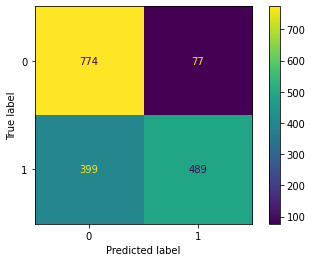

In [329]:
cm = metrics.confusion_matrix(
    y_true=y_valx['label'],
    y_pred=y_valx['predict'],
)

metrics.ConfusionMatrixDisplay(cm).plot()

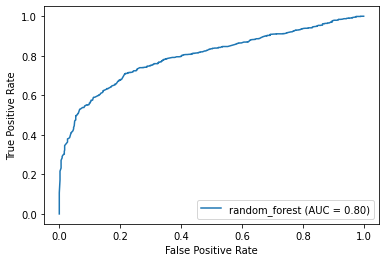

In [353]:
fpr, tpr, tresholds = metrics.roc_curve(
    y_true=y_valx['label'],
    y_score=y_valx['positive_prob'],
)

roc_auc = metrics.auc(
    x=fpr,
    y=tpr,
)

roc_curve = metrics.RocCurveDisplay(
    fpr=fpr,
    tpr=tpr,
    roc_auc=roc_auc,
    estimator_name='random_forest'
)

roc_curve.plot()

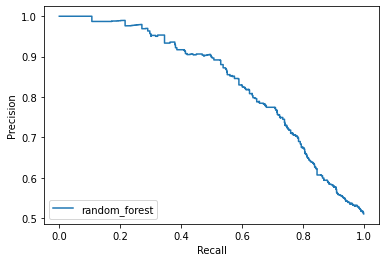

In [361]:
precision, recall, _ = metrics.precision_recall_curve(
    y_true=y_valx['label'],
    probas_pred=y_valx['positive_prob'],
    pos_label=True,
)

pr_curve = metrics.PrecisionRecallDisplay(
    precision=precision,
    recall=recall,
    estimator_name='random_forest',
)

pr_curve.plot()

### Locally saved results

In [107]:
# pkl_obj = 'modevalsel_X_train.pkl'
# pkl_obj = 'modevalsel_y_train.pkl'
# pkl_obj = 'modevalsel_X_val.pkl'
# pkl_obj = 'modevalsel_y_val.pkl'
# pkl_obj = 'modevalsel_test_x.pkl'
# pkl_obj = 'modevalsel_model_ml.pkl'

In [108]:
with open(pipeline_pkl_modtrain_local_dir + pkl_obj, 'rb') as obj:
    dfx = pickle.load(obj)

# Header 1

# *Notes*

## Testing interaction with AWS s3

### Setting the s3 client

In [ ]:
creds = read_yaml(creds_file_path)

In [ ]:
dev = boto3.Session(
    aws_access_key_id=creds['aws']['aws_access_key_id'],
    aws_secret_access_key=creds['aws']['aws_secret_access_key'],
)

In [ ]:
s3 = dev.client('s3')

### Listing buckets

In [ ]:
s3.list_buckets()

### Uploading file to bucket

#### Pre-created file

In [ ]:
## Uploading - test 1
file_path = dataset_dir + '/test_file.txt'
bucket = 'titanic-spaceship-aws-bucket'
upload_file(file_path, bucket, object_name=None)

In [ ]:
## Uploading - test 2
file_path = dataset_dir + '/test_file.txt'
bucket = 'titanic-spaceship-aws-bucket'
object_name = 'test_folder' + '/test_file.txt'
upload_file(file_path, bucket, object_name)

### Listing objects in bucket

In [ ]:
s3 = create_s3_client()

In [ ]:
bucket_name = base_bucket_name

In [ ]:
bucket_name = base_bucket_name
bucket_key = 'pipeline_pkls/extract'

[
    obj['Key'].split(sep='/')[-1]
    for obj
    in s3.list_objects_v2(Bucket=bucket_name, Prefix=bucket_key)['Contents']
]

In [ ]:
lx = list_objects_in_bucket_key(bucket_name, bucket_key)
lx

### Reading file from bucket

In [ ]:
s3 = create_s3_client()

In [ ]:
bucket_name = bucket_name
# bucket_key = os.path.join(aws_pipeline_pkl_extract, pipeline_pkl_extract_name)
bucket_key = 'pipeline_pkls/extract/extract_train.pkl'

In [ ]:
obj = s3.get_object(Bucket=bucket_name, Key=bucket_key)

In [ ]:
dfx = pickle.loads(obj['Body'].read())

## Using kaggle library

In [ ]:
kaggle.api.authenticate()

In [ ]:
kaggle.api.competition_download_files

In [ ]:
kaggle.api.competition_download_files(
    'spaceship-titanic', 
    path=dataset_dir, 
)

## Testing sklearn's imputer

In [26]:
dfx

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,
0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy
0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines
0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent
0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent
0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines
...,...,...,...,...,...,...,...,...,...,...,...
9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther
9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley
9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon


In [27]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Destination   8693 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8490 non-null   object 
 5   RoomService   8512 non-null   float32
 6   FoodCourt     8510 non-null   float32
 7   ShoppingMall  8485 non-null   float32
 8   Spa           8510 non-null   float32
 9   VRDeck        8505 non-null   float32
 10  Name          8693 non-null   object 
dtypes: float32(5), float64(1), object(5)
memory usage: 903.2+ KB


In [28]:
dfx[dfx['CryoSleep'].isnull()]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,
0099_02,Earth,NaN,TRAPPIST-1e,2.0,False,0.0,0.0,0.0,0.0,0.0,Thewis Connelson
0105_01,Earth,NaN,TRAPPIST-1e,27.0,False,0.0,0.0,570.0,2.0,131.0,Carry Cleachrand
0110_02,Europa,NaN,TRAPPIST-1e,40.0,False,0.0,331.0,0.0,0.0,1687.0,Aldeba Bootious
0115_01,Mars,NaN,TRAPPIST-1e,26.0,False,0.0,0.0,0.0,0.0,NaN,Rohs Pead
0173_01,Earth,NaN,TRAPPIST-1e,58.0,False,0.0,985.0,0.0,5.0,0.0,Hilip Grifford
...,...,...,...,...,...,...,...,...,...,...,...
9197_01,Europa,NaN,55 Cancri e,44.0,False,0.0,0.0,0.0,0.0,0.0,Bellus Platch
9227_05,Earth,NaN,TRAPPIST-1e,8.0,False,0.0,0.0,0.0,0.0,0.0,Hard Hinglendez
9246_01,Earth,NaN,TRAPPIST-1e,32.0,False,0.0,0.0,0.0,0.0,0.0,nan


In [29]:
f_cat = [
    feat
    for feat in titanicsp_full_data_schema
    if
        'feature_type' in titanicsp_full_data_schema[feat]
        and
        'categorical' in titanicsp_full_data_schema[feat]['feature_type']
        and
        titanicsp_full_data_schema[feat]['model_relevant']
        and
        feat in dfx.columns
        and
        dfx.shape[0] - dfx[feat].count() != 0
]

In [31]:
imp_med = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [34]:
dfx.loc[:, f_cat] = imp_med.fit_transform(dfx.loc[:, f_cat])

In [35]:
dfx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   object 
 1   CryoSleep     8693 non-null   bool   
 2   Destination   8693 non-null   object 
 3   Age           8514 non-null   float64
 4   VIP           8693 non-null   bool   
 5   RoomService   8512 non-null   float32
 6   FoodCourt     8510 non-null   float32
 7   ShoppingMall  8485 non-null   float32
 8   Spa           8510 non-null   float32
 9   VRDeck        8505 non-null   float32
 10  Name          8693 non-null   object 
dtypes: bool(2), float32(5), float64(1), object(3)
memory usage: 784.4+ KB


In [ ]:
dfx[dfx.index.isin(['0099_02', '0105_01'])]

## Header 2

---

---